**Detroit Housing Blight Notebook Part 1 :
Data Cleaning and Exploratory Data Analysis**

This notebook contains processes of data exploration and preliminary feature engineering with raw data.

1. Loading CSVs and checking/cleaning initial tables
2. Loading CSVs and checking/cleaning used tables
3. Creating new dataframe and feature engineering  
4. Initial EDA with dataframe
5. EDA after modeling

In [3]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.stats.api as sms
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn import preprocessing
from itertools import combinations

In [7]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

import warnings
warnings.filterwarnings("ignore")

Load CSV files into pandas dataframes

# Loading CSVs and checking/cleaning initial tables

## *Potental translation tables* - no longer relevant:

 These ended up being irrelevant to the final target, but were a part of the initial investigation and may be useful if crime or census tract-based data becomes relevant

In [59]:
census_geoid1 = pd.read_csv('Census_Block_Groups_Census_2010_Michigan.csv')
census_geoid1.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,City,TractBG,GlobalID,SqMiles,Acres
0,7366,26,163,538400,1,261635384001,Block Group 1,G5030,S,303493,0,42.429874,-83.136822,Detroit,5384001,4f36ea46-b851-4fc4-b484-b694f32019ca,0.117179,74.994753
1,7367,26,163,538100,1,261635381001,Block Group 1,G5030,S,367927,0,42.442592,-83.139165,Detroit,5381001,c73f88bf-6605-4462-85f5-9f71317af601,0.142057,90.916742
2,7368,26,163,537800,3,261635378003,Block Group 3,G5030,S,225740,0,42.389469,-83.185801,Detroit,5378003,3e6a4e7a-36c1-4b82-8ecd-0360a88e1f67,0.087159,55.781569
3,7369,26,163,537800,2,261635378002,Block Group 2,G5030,S,364088,0,42.392940,-83.184911,Detroit,5378002,618f8cf7-b8a8-4092-81ea-4e3c7f8132ef,0.140575,89.968104
4,7370,26,163,537800,1,261635378001,Block Group 1,G5030,S,237831,0,42.392587,-83.193778,Detroit,5378001,b13b92d2-01fe-4b72-9bff-e55e75b07a31,0.091827,58.769320


In [2]:
# county , census tract and GEOID10
# census block 2010 : conversion info state&county FIPS code, census tract #, GEOID10, city
census_geoid = pd.read_csv('Census_Block_Groups_Census_2010_Michigan.csv')
census_geoid.drop(['BLKGRPCE10','MTFCC10', 'FUNCSTAT10', 'ALAND10', 'INTPTLAT10','INTPTLON10',
                   'GlobalID', 'SqMiles', 'AWATER10', 'TractBG'], axis=1, inplace=True)
census_geoid.columns = ['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'CENSUSTRACT', 'GEOID10',
       'NAMELSAD10', 'City', 'Acres']
census_geoid['CENSUSTRACT'] = census_geoid['CENSUSTRACT'].apply(lambda x: x/100)
census_geoid.head()

,OBJECTID,STATEFP10,COUNTYFP10,CENSUSTRACT,GEOID10,NAMELSAD10,City,Acres
0,7366,26,163,5384.0,261635384001,Block Group 1,Detroit,74.994753
1,7367,26,163,5381.0,261635381001,Block Group 1,Detroit,90.916742
2,7368,26,163,5378.0,261635378003,Block Group 3,Detroit,55.781569
3,7369,26,163,5378.0,261635378002,Block Group 2,Detroit,89.968104
4,7370,26,163,5378.0,261635378001,Block Group 1,Detroit,58.769320


In [3]:
# County, entity, ANSI code
# FIPS state, county, entity, ANSI and GU codes with entity description
fips_codes = pd.read_excel('fips_codes_website.xls')
fips_codes = fips_codes.loc[fips_codes["State Abbreviation"] == 'MI']
fips_codes.head()

,State Abbreviation,State FIPS Code,County FIPS Code,FIPS Entity Code,ANSI Code,GU Name,Entity Description
14578,MI,26,139,1360,1625822,Allendale,charter township
14579,MI,26,161,3020,1625838,Ann Arbor,charter township
14580,MI,26,69,4300,1625865,Au Sable,charter township
14581,MI,26,161,4180,1625863,Augusta,charter township
14582,MI,26,17,5120,1625878,Bangor,charter township


In [2]:
# zipcode to other tract..
zip_tract10 = pd.read_excel('TRACT_ZIP_122010.xlsx')

NameError: name 'pd' is not defined

In [1]:
zip_tract10.loc[(zip_tract10['ZIP'] < 5000 )& (zip_tract10['ZIP'] > 4000)].head()

NameError: name 'zip_tract10' is not defined

In [114]:
parcels.ZONING.value_counts()

R1     187913
R2     132486
B4      20346
R3      10606
M4       7431
         4392
R5       3993
B2       3608
PD       2386
M3       1699
M2       1422
R6        934
SD2       669
SD4       626
R4        548
B5        519
B3        492
B6        307
M5        256
SD1       206
P1        199
PCA       111
B1         89
PR         76
TM         36
PC         26
SD5        23
W1          3
M1          2
Name: ZONING, dtype: int64

In [4]:
# getting table data from http://proximityone.com/ziptractequiv.htm#profiles
# for textarea in soup.findAll('textarea'):
#     contents = BeautifulSoup.BeautifulSoup(textarea.contents[0]).renderContents()
#     textarea.replaceWith(contents)

## *Dropped Features* : could be used in the future
 These tables weren't included due to their organization by GEOID or census tract and not zip code. Could be included in future projects.

In [5]:
# GEOID10 & residential/business percent occupied 
zoning_vacancy = pd.read_csv('Addresses_Use_and_Vacancy_Block_Q42016.csv')
zoning_vacancy.drop(["GlobalID",'Shape__Area','Shape__Length'], axis=1,inplace=True)
zoning_vacancy.dropna(subset=['PctVAC'],inplace=True) # drop rows that don't contain % vacant
zoning_vacancy.head()

,OBJECTID,GEOID10,OCC_RES,OCC_BUS,VAC_RES,VAC_BUS,TotalAddresses,TotalOCC,TotalVAC,TotRES,TotBUS,PctVAC
0,1001,261635357002007,35.0,NaN,17.0,NaN,52,35,17,52,0,0.326923
3,1004,261635356003014,18.0,NaN,1.0,NaN,19,18,1,19,0,0.052632
4,1005,261635347004015,6.0,NaN,1.0,NaN,7,6,1,7,0,0.142857
5,1006,261635347004020,7.0,2.0,1.0,3.0,13,9,4,8,5,0.307692
6,1007,261635353005021,24.0,1.0,4.0,NaN,29,25,4,28,1,0.137931


In [5]:
# major crimes from 2011-2014 by CENSUS TRACT
crimes = pd.read_csv('Reported_Major_Crimes_2011_to_2014.csv')
crimes.drop(['OFFENSEDESCRIPTION','STATEOFFENSEFILECLASS','SCA','PRECINCT',
             'LOCATION','ObjectId'], axis=1, inplace=True)
crimes.dropna(inplace=True)
crimes['INCIDENTDATE'] = crimes['INCIDENTDATE'].apply(lambda x: int(x[:4]))
crimes.reset_index();

# Loading CSVs and checking/cleaning used tables

 The tables that were kept for this project were transformed into "lite" versions of the initial tables, with additional columns engineered from the raw tables 
## *Rental Data Cleaning and EDA*: ('rental_lite')
 Contains historical rental registration data for homes in Detroit 2003-2018. Final data from this kept as a boolean feature named 'rental' that contains a 1 if it was in this dataset.

In [3]:
hist_rentals = pd.read_csv('Rental_Registrations_HISTORIC.csv')
hist_rentals.drop(hist_rentals.loc[hist_rentals.parcelnum.isnull()].index,inplace=True)
# add this feature in a later iteration
# hist_rentals['athome_owner'] = [True if str(hist_rentals['address'][i]).lower() == str(rentals['owner_address'][i]).lower() else (False) for i in range(len(rentals))]

In [435]:
hist_rentals.csm_recd_date.apply(lambda x: x[:4]).value_counts()

2018    3830
2004    1868
2017    1791
2005    1250
2016     953
2012     716
2006     584
2010     471
2008     464
2009     389
2013     375
2015     364
2011     326
2014     320
2007     299
2003     200
Name: csm_recd_date, dtype: int64

In [179]:
hist_rentals.head()

,X,Y,csm_caseno,csm_name_first,csm_name_last,csm_name_mi,csm_recd_by,csm_recd_date,address,parcelnum,action_description,csa_creation_date,csa_date1,csa_date2,csa_date3,csa_disp,pmb_dwelling_units,pmb_type_use,csm_status,case_type,ObjectId
0,-83.191594,42.366442,PMB2004-08763,NaN,UNIQUE HOME RENTALS LLC,NaN,BLACKSL,2004-06-25T00:00:00.000Z,9558 ROBSON,22043465.,Issue Initial Registration,2018-01-23T12:36:52.000Z,NaN,NaN,2018-01-23T00:00:00.000Z,DONE,1.0,SINGLE,DAH,PMB,1001
1,-83.096351,42.370188,PMB2004-08766,NaN,LEXINGTON VILLAGE,NaN,SPENCET,2004-06-25T00:00:00.000Z,1941 EUCLID,08002072-9,Issue Renewal Registration,2017-03-15T10:55:00.000Z,NaN,NaN,2017-03-15T00:00:00.000Z,DONE,8.0,APART,COC,PMB,1002
2,-83.097054,42.369922,PMB2004-08771,NaN,LEXINGTON VILLAGE,NaN,SPENCET,2004-06-25T00:00:00.000Z,1981 EUCLID,08002072-9,Issue Renewal Registration,2017-03-15T10:53:34.000Z,NaN,NaN,2017-03-15T00:00:00.000Z,DONE,8.0,TOWN,,PMB,1003
3,-83.098488,42.369382,PMB2004-08774,NaN,LEXINGTON VILLAGE,NaN,SPENCET,2004-06-25T00:00:00.000Z,2053 EUCLID,08002082-6,Issue Renewal Registration,2017-03-15T10:51:55.000Z,NaN,NaN,2017-03-15T00:00:00.000Z,DONE,8.0,APART,COC,PMB,1004
4,-83.245310,42.405536,PMB2004-08844,STARRLETT,JACKSON,NaN,WORDLAWT,2004-06-25T00:00:00.000Z,15763 BRAILE,22105664.,Issue Renewal Registration,2017-12-12T12:05:10.000Z,NaN,NaN,2017-12-12T00:00:00.000Z,DONE,1.0,SINGLE,REG,PMB,1005


In [4]:
rent_lite = pd.DataFrame(hist_rentals['parcelnum'].unique(), 
                         columns=['PARCELNUM'])
rent_lite['PARCELNUM'] = rent_lite['PARCELNUM'].apply(lambda x: x[:-1] if x[-1] == '.' else x) #clean up last .
rent_lite['rental'] = np.ones(len(rent_lite))

## *Blight Data and EDA*:  ('blight_lite') 
 Contains information about homes that have recieved a citiation for blighting on their homes. Engineered two columns: **total_tickets** (many parcels had more than one), and **total_due_parcel** which contained the sum of all tickets owed on that parcel. **total_tickets** was then made into a boolean feature and used as the target variable in the final dataframe.

In [8]:
# WARNING: will take a long time
blight = pd.read_csv('Blight_Violations_DAH.csv')
blight.drop(blight.loc[blight.parcelno == 'CONDO BUILDING'].index, inplace=True) #only non-condos
blight.drop(blight.loc[blight.city.lower() != 'detroit'].index, inplace=True) #only detroit homes
# generate column with total notifications total per parcel
blight['total_tickets'] = blight.parcelno.apply(lambda x: \
                                                blight.loc[blight.parcelno == x].shape[0])
# generate column with total sum owed per parcel
blight['total_due_parcel'] = blight.parcelno.apply(lambda x: blight.loc[blight.parcelno == x].\
                                                   balance_due.sum())

In [10]:
blight_lite = blight[['parcelno', 'total_due_parcel','total_tickets']]
blight_lite.columns = ['PARCELNUM','total_due_parcel','total_tickets']
blight_lite['PARCELNUM'] = blight_lite['PARCELNUM'].apply(lambda x: str(x)[:-1] if str(x)[-1] == '.' else str(x)) #clean up last .
blight_lite.drop_duplicates('PARCELNUM', inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


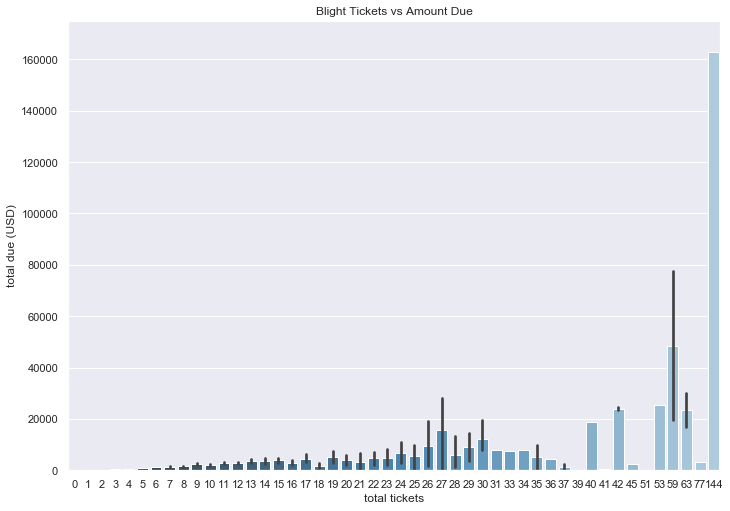

In [427]:
# barplot of total tickets due vs total amount due per parcel
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(blight_lite['total_tickets'], 
            blight_lite['total_due_parcel'], palette='Blues_d');
g.set(ylim=(0, 175000))
# g.set(ylim=(0, 2200000))
g.set(xlabel='total tickets', ylabel='total due (USD)',title='Blight Tickets vs Amount Due');

**Note:** det_blight kept as a table to explore aspects of a table with more relevant information

In [265]:
det_blight = blight[(blight['city'] == 'detroit') | (blight['city'] == 'Detroit') |\
                   (blight['city'] == 'DETROIT')| (blight['city'] == 'DETROIT ')]

In [303]:
det_blight.zip_code.value_counts()
det_blight['zip_lite'] = det_blight.violation_zip_code.apply\
(lambda x: str(x)[-4:-2] if str(x)[-2:]== '.0' else str(x)[:3])
det_blight.drop(det_blight[det_blight['zip_lite'] != '482'].index, inplace=True)
det_blight.drop(det_blight[(det_blight['violation_zip_code'] == '482') |\
                           (det_blight['violation_zip_code'] == '482O5') |\
                           (det_blight['violation_zip_code'] == '482 ') |\
                           (det_blight['violation_zip_code'] == '482`5') |\
                            (det_blight['violation_zip_code'] == '48229') |\
                            (det_blight['violation_zip_code'] == '482ST') |\
                          (det_blight['violation_zip_code'] == ' ')].index, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


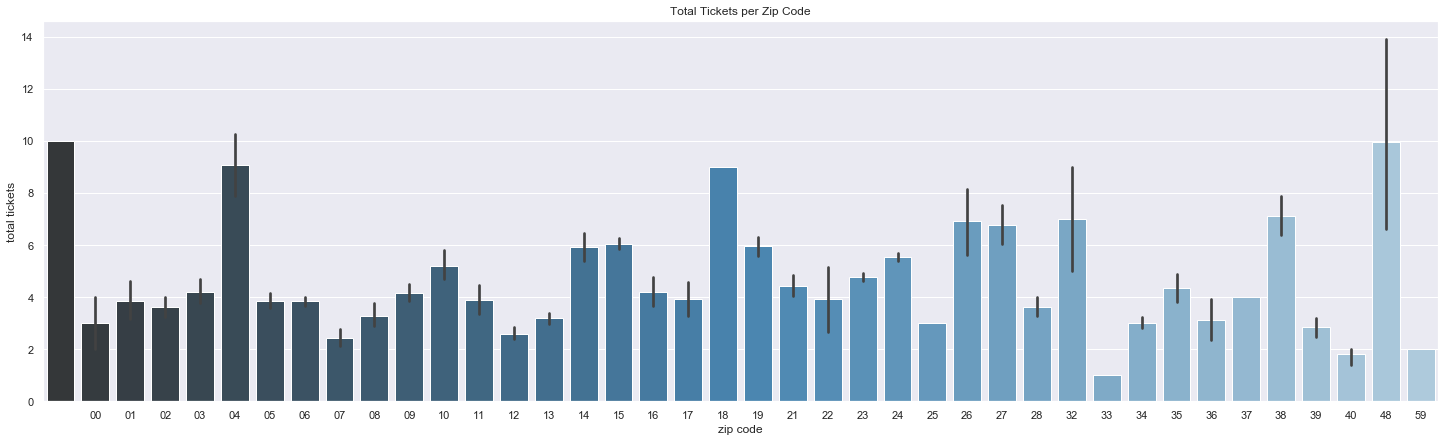

In [424]:
# plot zip codes against total tickets in det_blight
zips = det_blight.violation_zip_code.dropna().apply(lambda x: str(x)[-2:]).sort_values()
sns.set_style("white")
sns.set(rc={'figure.figsize':(25,7)})
d = sns.barplot(x=zips, y=det_blight.total_tickets, 
                palette='Blues_d');
d.set(xlabel='zip code', ylabel='total tickets', title='Total Tickets per Zip Code');

## *Tax Foreclosure Data and EDA*: ('tax_lite')
 Contains information about homes that have been foreclosed on as of 2016. A more thorough analysis would use tax foreclosure information that is up to date, and in line with the timeline of other tables (such as blight, 2003-2018). Engineered one column, **foreclosed**, to maintain whether or not the parcel had been on this list.

In [11]:
# tax foreclosure info
tax = pd.read_csv('Tax_Foreclosures_2016.csv')
tax_lite = pd.DataFrame(tax['PARCEL_ID'].unique(), 
                         columns=['PARCELNUM'])
tax_lite['foreclosed'] = np.ones(len(tax_lite))
tax_lite.head()

,PARCELNUM,foreclosed
0,21022049.,1.0
1,21024751.,1.0
2,21025836.002L,1.0
3,21023545.,1.0
4,21022958.,1.0


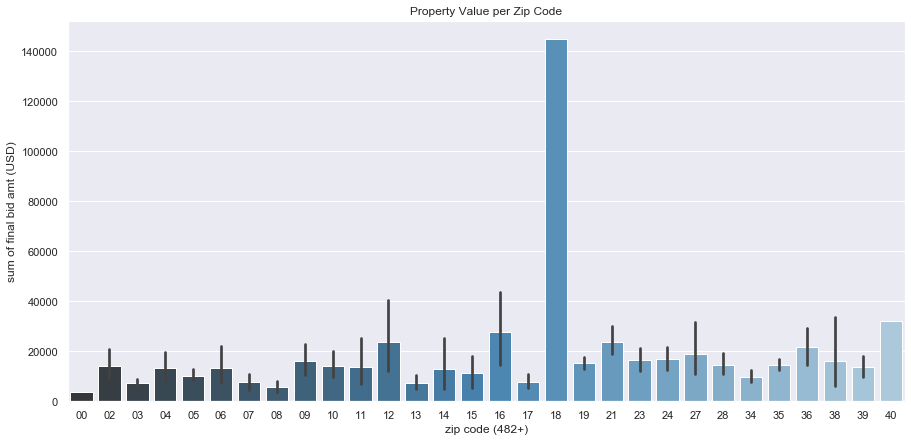

In [425]:
# looking at Amount Owed per Zip Code in Tax Foreclosure data
sns.set_style("white")
sns.set(rc={'figure.figsize':(15,7)})
s = sns.barplot(x=tax.PROP_ZIP_CD.dropna().apply(lambda x: str(x)[-4:-2]), y=tax.FINAL_BID_AMT, 
                palette='Blues_d');
s.set(xlabel='zip code (482+)', ylabel='sum of final bid amt (USD)', title='Property Value per Zip Code');

## *Parcels Data and EDA*:  ('parcels_lite')
 Contains most general information about all plots of land registered in Detroit as of 2019. Kept information regarding parcel number (PARCELNUM) as a primary key to join the other tables, along with feature: zip code, tax status, square feet, total acreage, total frontage, depth of lot, number of buildings on lot, sale price, sale date, taxable value, land value and zoning type. Features were engeineered: 
 - **govt_owned**: If owned by the city (using owner name), 
 - **athome_owner**: If owned by previous owner (using address)
 - **detroit_owner**: If owned by a Detroiter (using owner's city)
 - **sold**: If the parcel was listed with a sale price (using sales price)

The features used to engineer these new columns were discarded before being merged into the final dataframe.

In [12]:
# parcels info - likely not useful
parcels = pd.read_csv('Parcels.csv')
parcels = parcels[['PARCELNUM','ADDRESS', 'ZIP_CODE','OWNER1','OWN_STREET', 'OWN_CITY', 'OWN_ZIP',
         'TAX_STATUS','SQFT','TOTAL_ACRE', 'FRONTAGE', 'DEPTH','NUM_BLDGS', 
         'SALE_PRICE', 'SALE_DATE','TXBL_VAL', 'LAND_VALUE','ZONING']]
parcels['govt_owned'] = parcels.OWNER1.apply(lambda x: ('detroit' in x.lower()))
parcels['detroit_owner'] = parcels.OWN_CITY.apply(lambda x: (x.lower() == 'detroit'))
parcels['athome_owner'] = [(str(parcels['ADDRESS'][i]).lower() in \
                           str(parcels['OWN_STREET'][i]).lower()) for i in range(len(parcels))]
parcels['sold'] = parcels.SALE_PRICE.apply(lambda x: True if x != 0 else False)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,4,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
cols =['PARCELNUM', 'govt_owned','detroit_owner', 'athome_owner', 'sold','ZIP_CODE', 'TAX_STATUS',
       'SQFT', 'TOTAL_ACRE', 'FRONTAGE', 'DEPTH', 'NUM_BLDGS', 'SALE_PRICE', 'TXBL_VAL', 
       'LAND_VALUE', 'ZONING']
parcels_lite = parcels[cols]
parcels_lite['PARCELNUM'] = parcels_lite['PARCELNUM'].apply(lambda x: str(x)[:-1] if str(x)[-1] == '.' else str(x)) #clean up last .
parcels_lite.drop_duplicates('PARCELNUM', inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Creating new dataframe and feature engineering

In [312]:
# merge with tax foreclosures and clean
df = parcels_lite.merge(tax_lite, how='left', on='PARCELNUM')
df.foreclosed = df.foreclosed.apply(lambda x: int(x) if x == 1 else 0)

# merge with rentals and clean
df = df.merge(rent_lite, how='left', on='PARCELNUM')
df.rental = df.rental.apply(lambda x: int(x) if x == 1 else 0)

# merge with blight and clean
df = df.merge(blight_lite, how='left', on='PARCELNUM')
df.total_due_parcel = df.total_due_parcel.apply(lambda x: x if x > -1 else 0)
df.total_tickets = df.total_tickets.apply(lambda x: x if x > 0 else 0)

In [6]:
df.total_due_parcel.value_counts();

NameError: name 'df' is not defined

Save to CSV file for the next notebook

In [22]:
# df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
df.to_csv('C:\Desktop\flatiron 2019\mod5\project5\final_blight_df.csv', index=False)

**Feature Engineering :**

*encode features*

In [ ]:
df_hot = pd.get_dummies(df[1:-1])

In [110]:
X = df[list(df.columns)[1:-1]]
y = df['total_tickets'].apply(lambda x: int(x) if x==0 else 1)

# Initial EDA with dataframe

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [518]:
clf_tree = DecisionTreeClassifier()

In [519]:
clf_tree.fit(X_train,y_train)

ValueError: could not convert string to float: 

In [514]:
clf_forest = RandomForestClassifier()

In [515]:
clf_forest.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '22100874-95'

In [511]:
df.dtypes

PARCELNUM            object
govt_owned             bool
detroit_owner          bool
athome_owner           bool
sold                   bool
ZIP_CODE             object
TAX_STATUS           object
SQFT                float64
TOTAL_ACRE          float64
FRONTAGE            float64
DEPTH               float64
NUM_BLDGS             int64
SALE_PRICE            int64
TXBL_VAL              int64
LAND_VALUE            int64
ZONING               object
foreclosed            int64
rental                int64
total_due_parcel    float64
total_tickets       float64
dtype: object

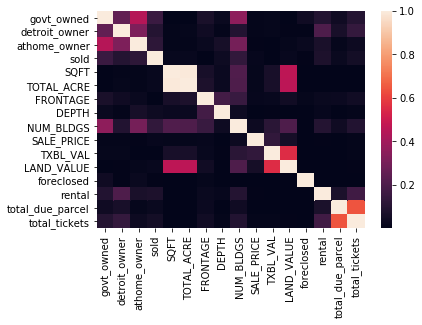

In [478]:
cor = abs(df.corr())
relevant = cor > 0.5
relevant.sum().sum()
sns.heatmap(cor);

In [21]:
df.shape

(381353, 20)

In [ ]:
# view joint plots to see regression trends across features
for item in curr_col[1:]:
    sns.jointplot(df[item], data['SalePrice'], data=df, kind='reg');

# EDA after Modeling

In [313]:
df_lite = df.drop('PARCELNUM', axis=1)
# df_hot = pd.get_dummies(df, drop_first=True)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler=MinMaxScaler()

In [391]:
(df[(df.detroit_owner == False) & (df.total_tickets > 0)].shape) > (df[(df.detroit_owner == False) & (df.total_tickets == 0)].shape)

False

In [429]:
# what percent WITH blight tickets is detroit owner or not 
print( 'WITH blight tickets: %',
      (df[(df.rental == True) & (df.total_tickets > 0)].shape[0]/w_tix)*100, 'rental  %',
      (df[(df.rental == False) & (df.total_tickets > 0)].shape[0]/w_tix)*100, 'not rental')

WITH blight tickets: % 17.49169569796646 rental  % 82.50830430203354 not rental


In [431]:
# what percent WITHOUT blight tickets is detroit owner or not 
print(' WITHOUT blight tickets: %'
,(df[(df.rental == True) & (df.total_tickets == 0)].shape[0]/wout_tix)*100, 'are rental' 
'%',(df[(df.rental == False) & (df.total_tickets == 0)].shape[0]/wout_tix)*100, 'are not rental')

 WITHOUGH blight tickets: % 2.249156776488994 are rental% 97.75084322351101 are not rental


In [414]:
# what percent WITH blight tickets is detroit owner or not 
print( 'WITHOUT blight tickets: %',
      (df[(df.detroit_owner == True) & (df.total_tickets > 0)].shape[0]/w_tix)*100, 'det owner  %',
      (df[(df.detroit_owner == False) & (df.total_tickets > 0)].shape[0]/w_tix)*100, 'not det')

WITH blight tickets: % 57.959977315077374 det owner  % 42.040022684922626 not det


In [408]:
wout_tix = len(df[df.total_tickets == 0])
w_tix = len(df[df.total_tickets > 0])

In [409]:
# what percent WITHOUT blight tickets is detroit owner or not 
print(' WITHOUT blight tickets: %'
,(df[(df.detroit_owner == True) & (df.total_tickets == 0)].shape[0]/wout_tix)*100, 'are det' 
'%',(df[(df.detroit_owner == False) & (df.total_tickets == 0)].shape[0]/wout_tix)*100, 'are not det')

 WITHOUGH blight tickets: % 84.60244429678103 are det% 15.397555703218968 are not det


In [396]:
(df[(df.detroit_owner == True)].shape) > (df[(df.detroit_owner == False)].shape)

True

In [394]:
(df[(df.detroit_owner == True)].total_due_parcel.sum()) > (df[(df.detroit_owner == False)].total_due_parcel.sum())

True

In [390]:
(df[(df.detroit_owner == True) & (df.total_tickets > 0)].shape) > (df[(df.detroit_owner == True) & (df.total_tickets == 0)].shape)

False

In [389]:
(df[(df.govt_owned == True) & (df.total_tickets > 0)].shape) > (df[(df.govt_owned == True) & (df.total_tickets == 0)].shape)

False

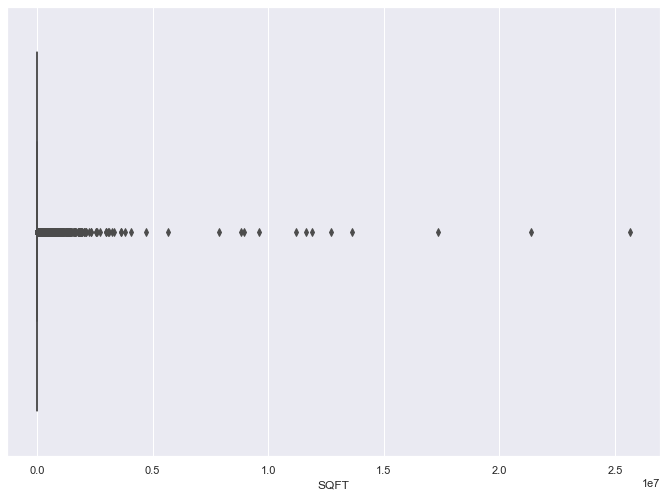

In [364]:
sns.boxplot(df.SQFT)

In [ ]:
sq = pd.DataFrame(df.SQFT.value_counts()).reset_index()
sq.head()
# sns.barplot(sq.index, sq.SQFT)

In [385]:
df.head()

,PARCELNUM,govt_owned,detroit_owner,athome_owner,sold,ZIP_CODE,TAX_STATUS,SQFT,TOTAL_ACRE,FRONTAGE,DEPTH,NUM_BLDGS,SALE_PRICE,TXBL_VAL,LAND_VALUE,ZONING,foreclosed,rental,total_due_parcel,total_tickets
0,08003860,True,True,False,False,48206,CITY LAND BANK,3136.0,0.072,30.0,104.0,0,0,0,479,R2,0,0,0.0,0.0
1,08004437,True,True,False,False,48238,CITY LAND BANK,3000.0,0.060,30.0,100.0,0,0,0,424,R2,0,0,0.0,0.0
2,08004879,False,True,False,False,48238,TAXABLE,3925.0,0.090,40.0,98.0,0,0,400,890,R2,0,0,0.0,0.0
3,08004903,False,False,False,False,48238,TAXABLE,3485.0,0.080,35.0,100.0,1,0,12900,689,R2,0,0,0.0,0.0
4,08004922,True,True,False,True,48238,CITY LAND BANK,3485.0,0.080,35.0,100.0,0,3000,0,689,R2,0,0,0.0,0.0
